In [1]:
import helpers
from helpers import *
print(least_busy)

ibmqx4


### W6 O(log n)

         ┌──────────────────┐                            ┌───┐»
q0_0: |0>┤ U3(-0.61548,0,0) ├────────────────────────────┤ X ├»
         └──────┬───┬───────┘                       ┌───┐└─┬─┘»
q0_1: |0>───────┤ X ├──────────■────────────────────┤ X ├──■──»
         ┌──────┴───┴──────┐ ┌─┴─┐┌────────────────┐└─┬─┘     »
q0_2: |0>┤ U3(-0.7854,0,0) ├─┤ X ├┤ U3(0.7854,0,0) ├──■────■──»
         ├─────────────────┴┐└───┘└────────────────┘     ┌─┴─┐»
q0_3: |0>┤ U3(-0.61548,0,0) ├────────────────────────────┤ X ├»
         ├─────────────────┬┘                            └───┘»
q0_4: |0>┤ U3(-0.7854,0,0) ├──────────────────────────────────»
         ├─────────────────┤                                  »
q0_5: |0>┤ U3(-0.7854,0,0) ├──────────────────────────────────»
         └─────────────────┘                                  »
«      ┌─────────────────┐                                 ┌───┐     
«q0_0: ┤ U3(0.61548,0,0) ├──■────■─────────────────────────┤ X ├─────
«      └─────────────────┘┌─

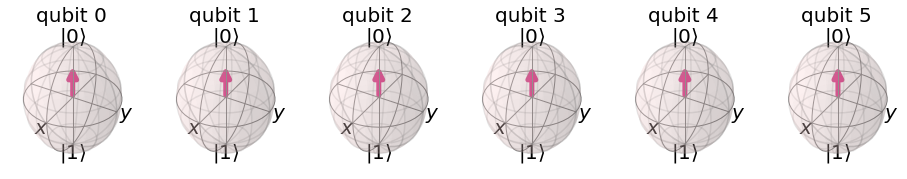

In [3]:
qreg = QuantumRegister(6)
w8 = QuantumCircuit(qreg)
w8.x(qreg[1])
# 1->2
Bdirect(w8, qreg, 2, 1, 1/2)
# 1->0
# 2->3
Bdirect(w8, qreg, 0, 1, 1/3)
Bdirect(w8, qreg, 3, 2, 1/3)
# 0->4
# 3->5
Bdirect(w8, qreg, 4, 0, 0.5)
Bdirect(w8, qreg, 5, 3, 0.5)
print(w8)
job = qiskit.execute(w8, Aer.get_backend('statevector_simulator'))
theorical_psi = job.result().get_statevector(w8)
print(theorical_psi)
plot_bloch_multivector(theorical_psi)

In [4]:
jobs = []
cricuits_pool = []
tomo_circuits = state_tomography_circuits(w8, qreg)
circuits_pool = split_list(tomo_circuits, math.ceil(len(tomo_circuits)/243))
for circuits_chunk in circuits_pool:
    job = qiskit.execute(circuits_chunk,
                         simulator,
                         noise_model=noise_model_melbourne,
                         coupling_map=coupling_map_melbourne,
                         basis_gates=basis_gates_melbourne)
    job_monitor(job, monitor_async = True)
    jobs.append(job)

calib_circuit, state_labels = mc.complete_meas_cal(qr=qreg)
job_cal = qiskit.execute(calib_circuit,
                         simulator,
                         noise_model=noise_model_melbourne,
                         coupling_map=coupling_map_melbourne,
                         basis_gates=basis_gates_melbourne)
job_monitor(job_cal, monitor_async=True)

HTML(value="<p style='font-size:16px;'>Job Status: job is being initialized </p>")

HTML(value="<p style='font-size:16px;'>Job Status: job is being initialized </p>")

HTML(value="<p style='font-size:16px;'>Job Status: job is being initialized </p>")

HTML(value="<p style='font-size:16px;'>Job Status: job is being initialized </p>")

HTML(value="<p style='font-size:16px;'>Job Status: job is being initialized </p>")

HTML(value="<p style='font-size:16px;'>Job Status: job is being initialized </p>")

HTML(value="<p style='font-size:16px;'>Job Status: job is being initialized </p>")

HTML(value="<p style='font-size:16px;'>Job Status: job is being initialized </p>")

HTML(value="<p style='font-size:16px;'>Job Status: job is being initialized </p>")

HTML(value="<p style='font-size:16px;'>Job Status: job is being initialized </p>")

In [5]:
data = []
for job in jobs:
    data += job.result().results
results = jobs[0].result()
results.results = data
cal_results = job_cal.result()
meas_fitter = mc.CompleteMeasFitter(cal_results, state_labels)
correct_results = meas_fitter.filter.apply(results)
fitter = StateTomographyFitter(correct_results, tomo_circuits)
fitted_rho = fitter.fit()
fidelity = state_fidelity(theorical_psi, fitted_rho)
print(fidelity)

0.6519252336562048


In [ ]:
# 0.65